# Vec2Text Reproduction & Extension Analysis
### IR2 Group 00

In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

#### Effect of beam width on BLEU and Runtime (50 Steps)

In [2]:
results_dir = 'repro_results'

data = pd.read_excel(os.path.join(results_dir, 'T1-GTR.xlsx'), skiprows=1)

# Convert 'Runtime (min)' from time format to total minutes
def time_to_minutes(time_obj):
    return time_obj.hour * 60 + time_obj.minute + time_obj.second / 60

data = data[data['Steps'] == 50]

data['Runtime (min)'] = data['Runtime (min)'].apply(time_to_minutes)

print(data.columns)
# # Calculate BLEU-to-Runtime Ratio
# data['BLEU-to-Runtime Ratio'] = data['BLEU'] * 100 / data['Runtime (min)']

# # Calculate BLEU Improvement
# data['BLEU Improvement'] = data['BLEU'].diff().fillna(0) * 100

Index(['Steps', 'Beam', 'Tokens', 'Pred Tokens', 'BLEU', 'TF1', 'Exact', 'Cos',
       'Runtime (min)', 'Peak Memory (MB)'],
      dtype='object')


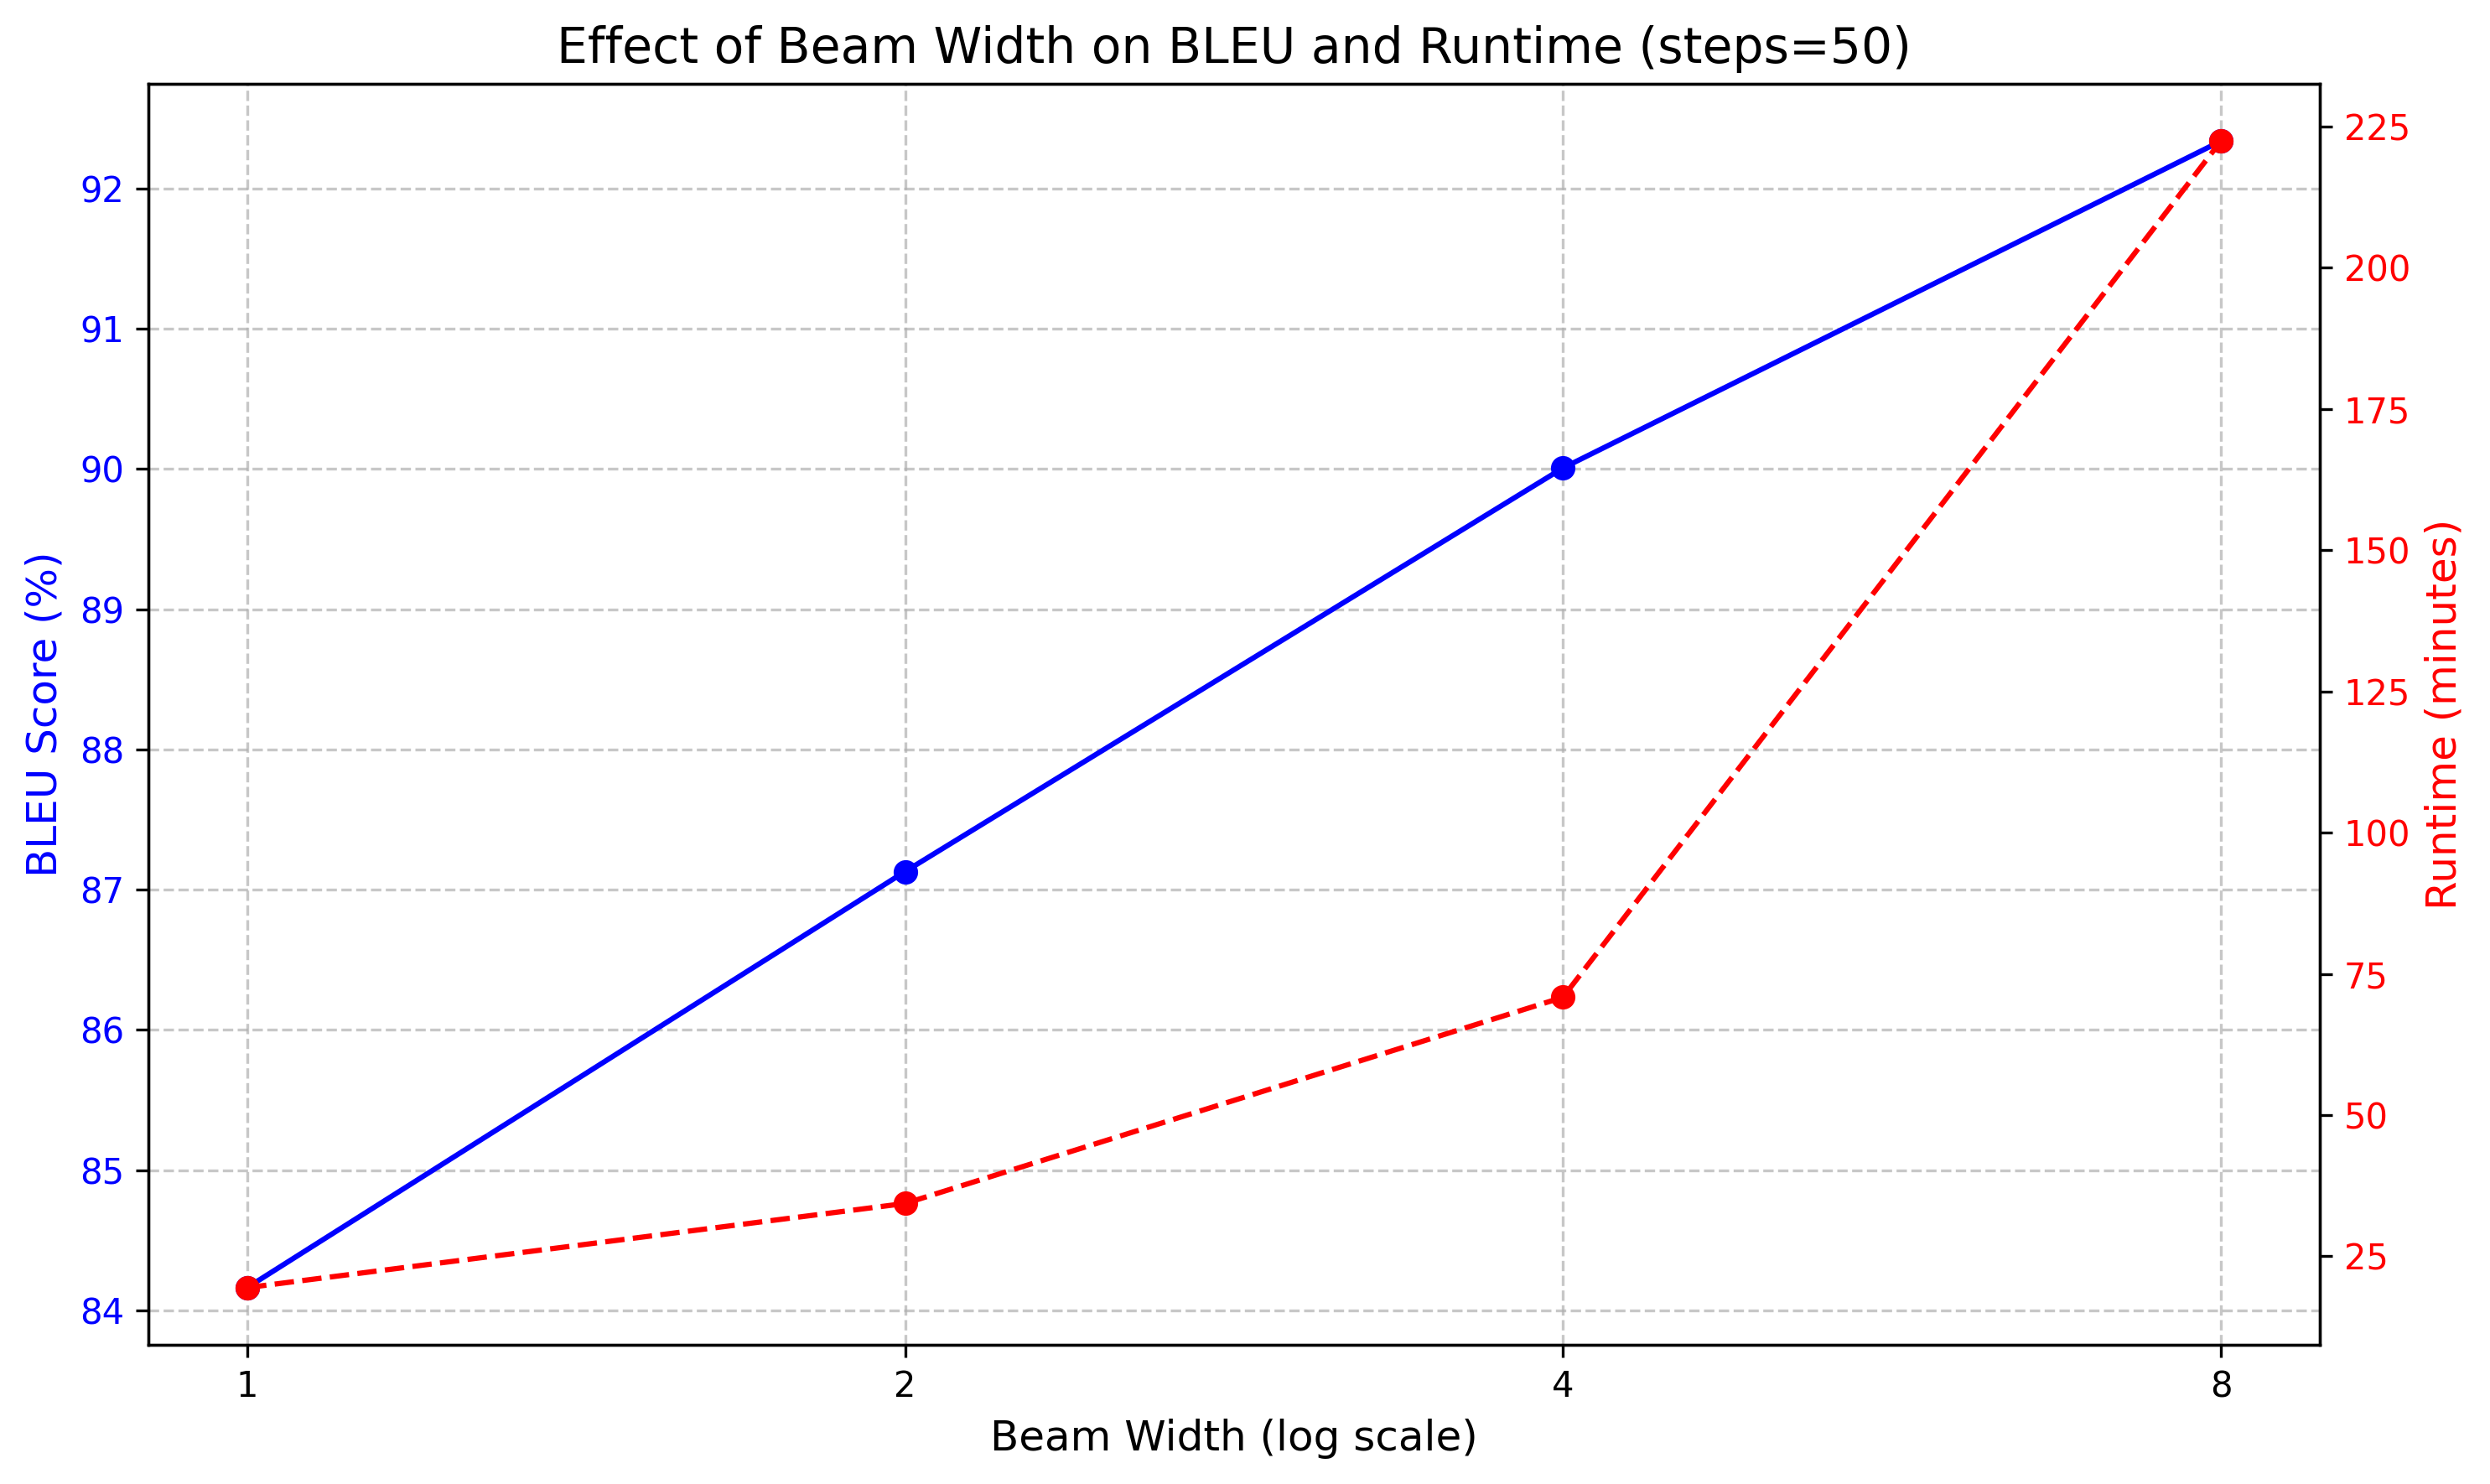

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

ax1.set_title('Effect of Beam Width on BLEU and Runtime (steps=50)', fontsize=14)
ax1.set_xlabel('Beam Width (log scale)', fontsize=12)
ax1.set_xscale('log')
ax1.set_xticks([1, 2, 4, 8])
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_xaxis().set_minor_formatter(plt.NullFormatter())
ax1.tick_params(axis='x', which='minor', bottom=False)

# BLEU Score on the left y-axis
ax1.set_ylabel('BLEU Score (%)', fontsize=12, color='blue')
ax1.plot(data['Beam'], data['BLEU'] * 100, 'o-', color='blue', label='BLEU Score')
ax1.tick_params(axis='y', labelcolor='blue')

# Runtime on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (minutes)', fontsize=12, color='red')
ax2.plot(data['Beam'], data['Runtime (min)'], 'o--', color='red', label='Runtime')
ax2.tick_params(axis='y', labelcolor='red')

# Annotate BLEU-to-Runtime Ratio on the plot
# for i, row in data.iterrows():
#     ax1.text(row['Beam'], row['BLEU'] * 100 + 0.5, f"{row['BLEU-to-Runtime Ratio']:.2f}", 
#              fontsize=12, color='green', ha='center')
# legend_text = (r"$\text{BLEU-to-Runtime Ratio} = \frac{\text{BLEU} (\%)}{\text{Runtime (min)}}$")
# fig.text(0.11, 0.91, legend_text, fontsize=10, color='green', va='top', ha='left')

# Gridlines and layout
ax1.grid(visible=True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

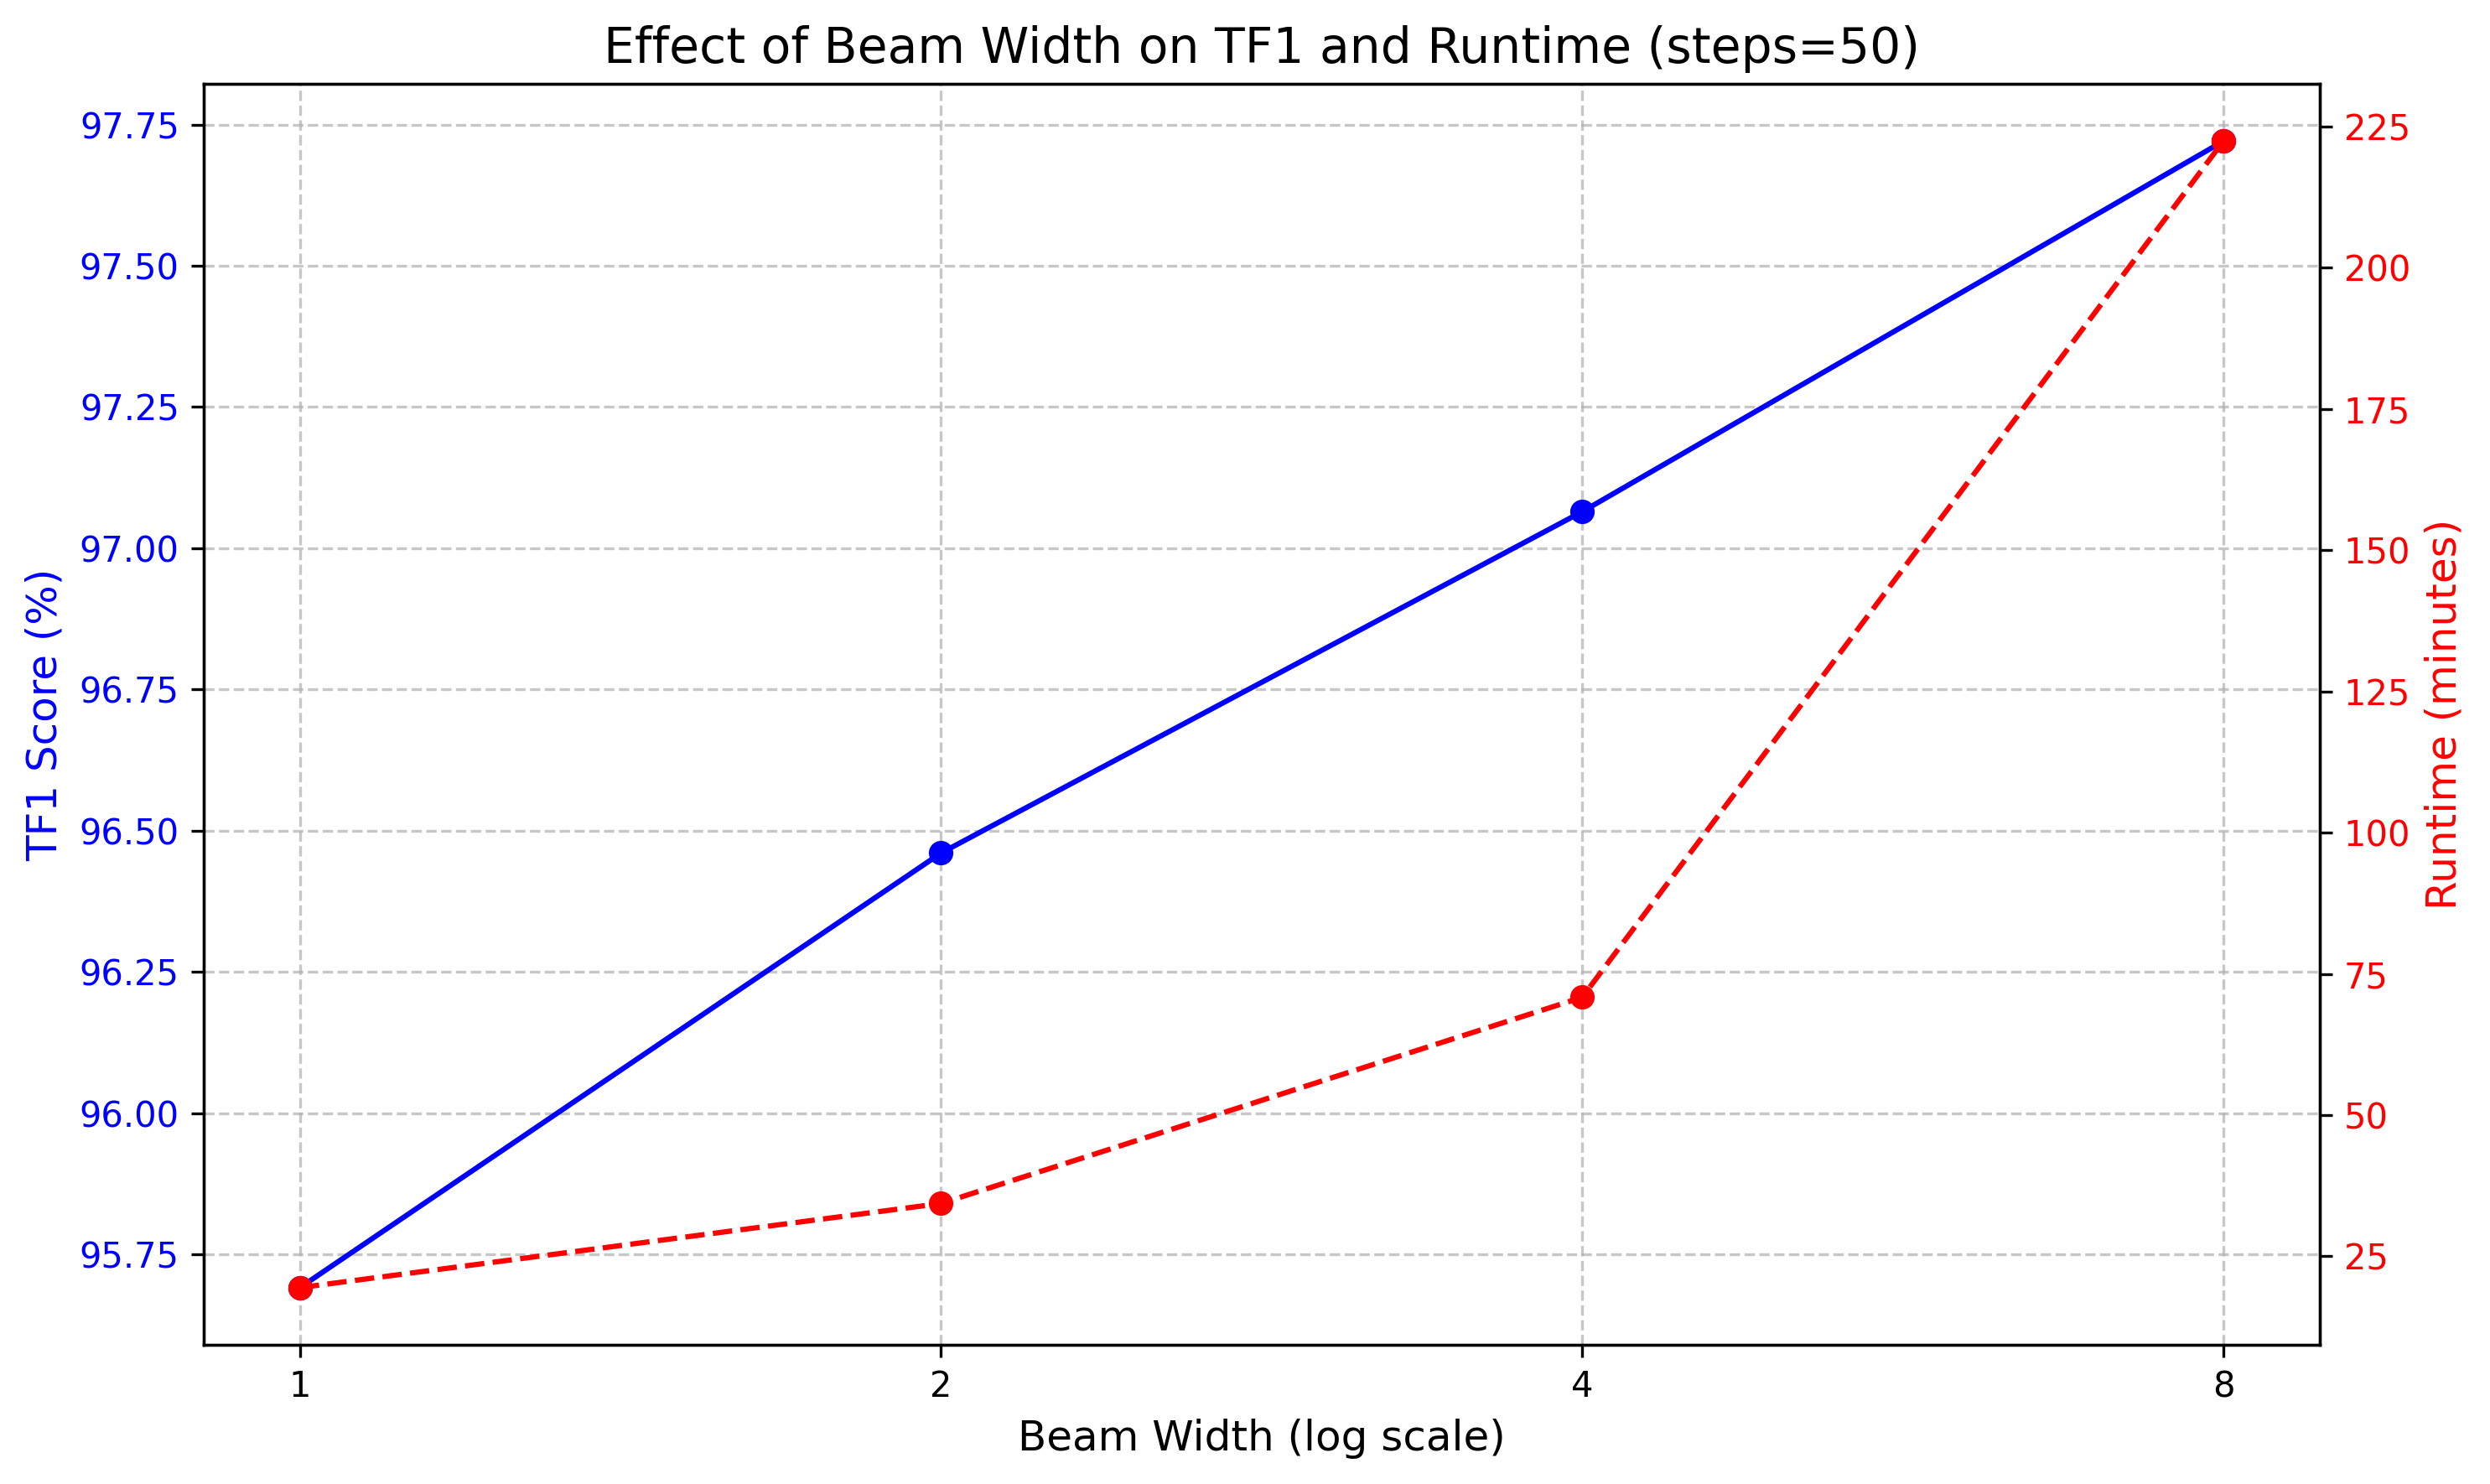

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

ax1.set_title('Effect of Beam Width on TF1 and Runtime (steps=50)', fontsize=14)
ax1.set_xlabel('Beam Width (log scale)', fontsize=12)
ax1.set_xscale('log')
ax1.set_xticks([1, 2, 4, 8])
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_xaxis().set_minor_formatter(plt.NullFormatter())
ax1.tick_params(axis='x', which='minor', bottom=False)

# TF1 Score on the left y-axis
ax1.set_ylabel('TF1 Score (%)', fontsize=12, color='blue')
ax1.plot(data['Beam'], data['TF1'] * 100, 'o-', color='blue', label='TF1 Score')
ax1.tick_params(axis='y', labelcolor='blue')

# Runtime on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (minutes)', fontsize=12, color='red')
ax2.plot(data['Beam'], data['Runtime (min)'], 'o--', color='red', label='Runtime')
ax2.tick_params(axis='y', labelcolor='red')

# Gridlines and layout
ax1.grid(visible=True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

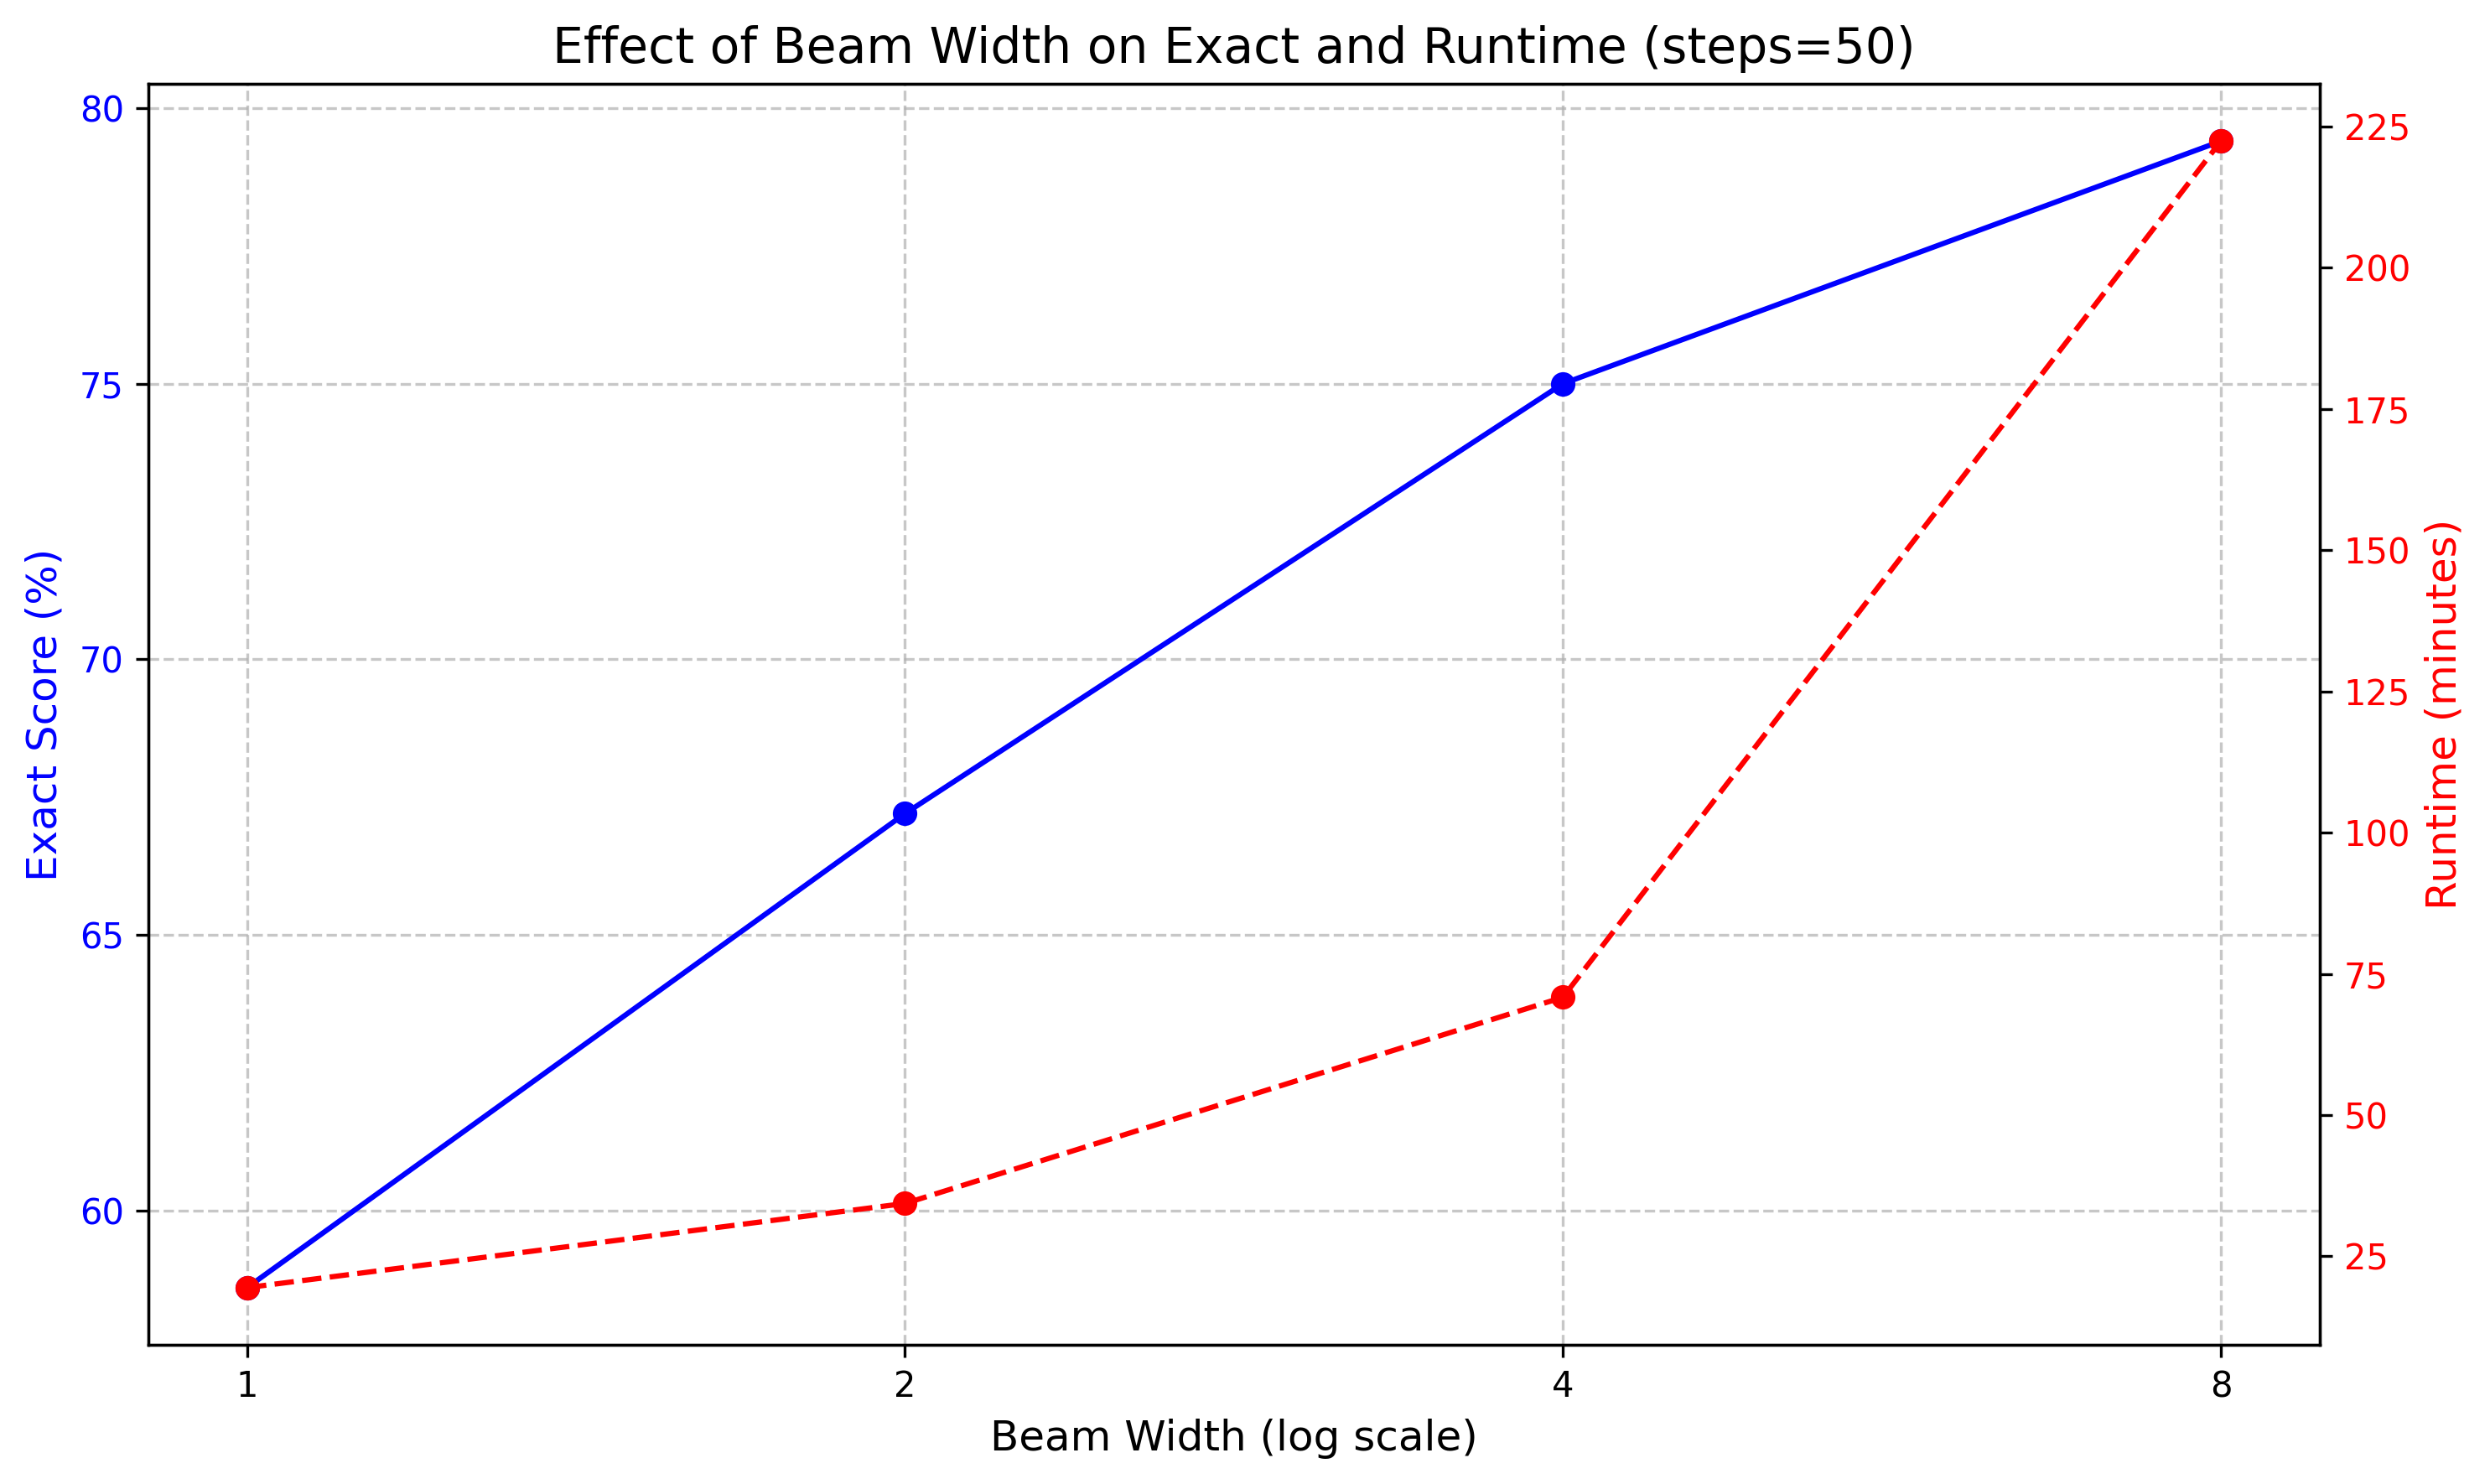

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

ax1.set_title('Effect of Beam Width on Exact and Runtime (steps=50)', fontsize=14)
ax1.set_xlabel('Beam Width (log scale)', fontsize=12)
ax1.set_xscale('log')
ax1.set_xticks([1, 2, 4, 8])
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.get_xaxis().set_minor_formatter(plt.NullFormatter())
ax1.tick_params(axis='x', which='minor', bottom=False)

# Exact Score on the left y-axis
ax1.set_ylabel('Exact Score (%)', fontsize=12, color='blue')
ax1.plot(data['Beam'], data['Exact'] * 100, 'o-', color='blue', label='Exact Score')
ax1.tick_params(axis='y', labelcolor='blue')

# Runtime on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (minutes)', fontsize=12, color='red')
ax2.plot(data['Beam'], data['Runtime (min)'], 'o--', color='red', label='Runtime')
ax2.tick_params(axis='y', labelcolor='red')

# Gridlines and layout
ax1.grid(visible=True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()